In [ ]:
!pip3 install scikit-learn pandas matplotlib

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Matriz de Confusão

In [19]:
df_veredict = pd.read_csv("veredict/has_hallucination.csv", index_col=False)

df_veredict

,id,PERGUNTA,RESPOSTA,human_has_input_hallucination,human_has_context_hallucination,human_has_factual_hallucination,llama_has_input_hallucination,llama_has_context_hallucination,llama_has_factual_hallucination,gpt_has_input_hallucination,gpt_has_context_hallucination,gpt_has_factual_hallucination
0,1,O que caracteriza o crime de peculato?,O crime de peculato é caracterizado por apropr...,0,0,0,0,0,0,0,0,0
1,2,Qual a pena prevista para injúria quando há ut...,A pena prevista para injúria quando há utiliza...,0,0,0,0,0,0,0,0,0
2,3,O que caracteriza o feminicídio?,O feminicídio é uma qualificadora do crime de ...,0,0,0,0,0,0,0,0,0
3,4,Quais ações constituem o crime de extorsão?,Constituem o crime de extorsão as ações de con...,0,0,0,0,0,0,0,0,0
4,5,O que caracteriza a legítima defesa?,A legítima defesa é caracterizada por repelir ...,0,0,0,0,0,0,0,0,0
5,6,O que caracteriza o crime de corrupção passiva?,O crime de corrupção ativa é caracterizado por...,1,0,0,1,0,0,1,0,0
6,7,Qual é a pena para o crime de homicídio simples?,A pena para o crime de homicídio culposo é de ...,1,0,0,1,0,1,1,0,1
7,8,Qual é a pena para o crime de lesão corporal c...,A pena para o crime de lesão corporal de natur...,1,0,0,1,0,1,1,0,0
8,9,Qual é a pena para o crime de furto simples?,A pena para o crime de furto qualificado é de ...,1,0,0,1,0,1,1,0,1
9,10,Como a legislação penal brasileira trata o rei...,A legislação penal estrangeira não tipifica di...,1,0,0,0,0,0,0,0,0


In [20]:
#Extraindo as colunas com o julgamento humano primeiro, pois elas serão usadas em ambos os casos

human_judge_input = []
human_judge_context = []
human_judge_factual = []
    
for idx, row in df_veredict.iterrows():
        
    human_input_hallucination = row["human_has_input_hallucination"]
    human_contextual_hallucination = row["human_has_context_hallucination"]
    human_factual_hallucination = row["human_has_factual_hallucination"]   

    
    human_judge_input.append(human_input_hallucination)
    human_judge_context.append(human_contextual_hallucination)
    human_judge_factual.append(human_factual_hallucination)
        

In [21]:
print(human_judge_input)
print(human_judge_context)
print(human_judge_factual)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [22]:
def get_hallucinations(judge=""):
    input_hallucination = []
    context_hallucination = []
    factual_hallucination = []
    
    for idx, row in df_veredict.iterrows():
        
        has_input_hallucination = row[f"{judge}_has_input_hallucination"]
        has_contextual_hallucination = row[f"{judge}_has_context_hallucination"]
        has_factual_hallucination = row[f"{judge}_has_factual_hallucination"]   

        
        input_hallucination.append(has_input_hallucination)
        context_hallucination.append(has_contextual_hallucination)
        factual_hallucination.append(has_factual_hallucination)
        
    return {
        "input": input_hallucination,
        "context": context_hallucination,
        "factual":factual_hallucination
    }

In [23]:
def create_confusion_matrix(true, pred):
    cf_matrix = confusion_matrix(true, pred)
    return cf_matrix

## Llama

In [24]:
llama_judge = get_hallucinations(judge="llama")

In [25]:
llama_input = llama_judge["input"]
llama_context = llama_judge["context"]
llama_factual = llama_judge["factual"]

### Alucinações de input

In [29]:
cf_matrix = create_confusion_matrix(human_judge_input, llama_input)

In [39]:
print(f"True Negative: {cf_matrix[0][0]}")
print(f"False Positive: {cf_matrix[0][1]}")
print(f"False Negative: {cf_matrix[1][0]}")
print(f"True Positive: {cf_matrix[1][1]}")

True Negative: 13
False Positive: 2
False Negative: 2
True Positive: 8


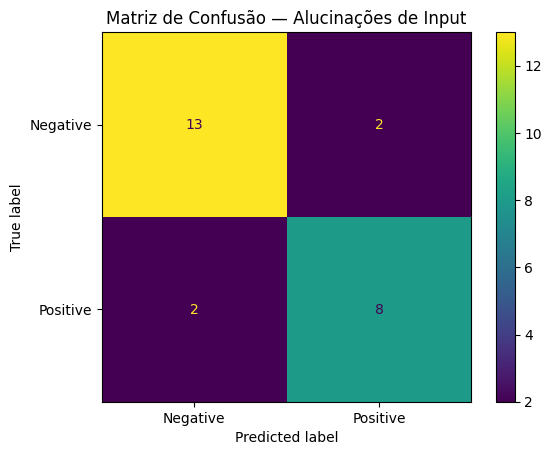

In [40]:
labels = ["Negative", "Positive"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=labels)

cm_display.plot()

plt.title('Matriz de Confusão — Alucinações de Input')
plt.show()